**Test 1: lifelong learning_Chinese_1.xlsx**

In [ ]:
import os
import pandas as pd
import re
import jieba
import jieba.posseg as psg
from gensim.models import KeyedVectors
from matplotlib import pyplot as plt
import numpy as np

In [ ]:
Chinese_df = pd.read_excel("/content/lifelong learning_Chinese_1.xlsx")

# delate the NA abstracts
Chinese_df.dropna(subset=['摘要'], inplace=True)

# delete rows where the character numbers are less than 15.
for index, row in Chinese_df.iterrows():
    if len(row["摘要"]) < 15:
        Chinese_df.drop(index, inplace=True)

# reset the index
Chinese_df.reset_index(drop=True, inplace=True)

Chinese_df.head(5)

,来源库,题名,作者,单位,文献来源,摘要,发表时间,年份
0,期刊,做善于学习、终身学习的知识型会计师,徐彪,侯马市普天电缆股份有限公司 山西侯马043015,经济师,"文章紧紧围绕知识经济特征 ,阐述了现代会计应当及时进行观念更新和补充知识与更新知识 ,努力提...",2003-07-15,2003
1,期刊,作为终身学习评价体系的澳大利亚资格框架,刘超;高益民;,教育部人文社会科学重点研究基地北京师范大学比较教育研究中心北京师范大学国际与比较教育研究所;,比较教育研究,"建立针对个人学习成果的综合评价体系,是构建终身学习社会的必然要求。澳大利亚资格框架(AQF)...",2009-03-10,2009
2,期刊,组建社区教育学院 构建终身教育体系 促进社区和谐发展,覃广泉;林小珊;王展乐;,仲恺农业工程学院;广州医学院护理学院;番禺市桥成人教育技术学校;,继续教育研究,"社区教育是不同于普通学校教育和成人教育的新的教育形式,社区教育学院是由当地政府举办的,集公益...",2010-06-15,2010
3,期刊,走向自由、终身学习之路:欧洲学分转换系统的发展历程、规程与前程,陈涛;刘晶蕾;张宝昆;,云南师范大学高等教育与区域发展研究院;德国克劳斯塔尔工业大学机械工程学院;,比较教育研究,"欧洲学分转换系统堪称学分积累与转换制度的世界级典范,影响深远,备受关注。沿着其发展历程、规程...",2012-09-10,2012
4,期刊,走向终身学习化的欧洲——欧盟成人教育发展走势一瞥,蒋莉,北京教育科学研究院 北京100031,成人教育,应欧洲成人教育协会、欧盟委员会文化教育总司、德国成人教育研究所、德国成人教育协会国际合作所、...,2004-04-10,2004


In [ ]:
# input stopwords
stop_file = "/content/Chinese_stopwords.txt"

stopword_list = []
# read the stopwords.txt file
with open(stop_file, 'r', encoding='utf-8') as file:
    # read stopwords and save into the list
    for line in file:
        stopword_list.append(line.strip())  # delete empty symbols

# create the predicted topics for LDA
predict_topic_csv_path = 'topic-distribution.csv'

In [ ]:
Chinese_df['摘要'] = Chinese_df['摘要'].astype(str)   # transfer 'Abstract' into strings

# define a function to remove stopwords
def clean_text(text):
  words = jieba.lcut(text)
  words = [w for w in words if w not in stopword_list]
  return ' '.join(words)

Chinese_df["Contents"] = Chinese_df["摘要"].apply(clean_text)

Chinese_df["Contents"].head(5)

Building prefix dict from the default dictionary ...
DEBUG:jieba:Building prefix dict from the default dictionary ...
Dumping model to file cache /tmp/jieba.cache
DEBUG:jieba:Dumping model to file cache /tmp/jieba.cache
Loading model cost 0.966 seconds.
DEBUG:jieba:Loading model cost 0.966 seconds.
Prefix dict has been built successfully.
DEBUG:jieba:Prefix dict has been built successfully.


,Contents
0,"文章 紧紧围绕 知识经济 特征 , 阐述 会计 观念更新 补充 知识 更新 知识 ,..."
1,"针对 成果 综合 评价 , 。 澳大利亚 资格 框架 ( AQF ) 下 ; 涵盖 传统 正..."
2,"社区 不同于 学校 成人教育 新 形式 , 社区 学院 当地政府 举办 , 集 公益性 、 ..."
3,"欧洲 学分 转换 系统 堪称 学分 积累 转换 制度 世界级 典范 , 影响 深远 , 备受..."
4,应 欧洲 成人教育 协会 、 欧盟委员会 文化教育 总司 、 德国 成人教育 研究所 、 德...


In [ ]:
def chinese_word_cut(mytext):
    flag_list = ['a','ag','an','b','d','dg','h','i','j','l','n','ng','nr','nrfg','nrt','ns','nt','nz','r','rg','rr','rz','t','tg','vn']

    word_list = []

    #jieba tokenization
    seg_list = psg.cut(mytext)
    for seg_word in seg_list:
        word = re.sub(u'[^\u4e00-\u9fa5]','',seg_word.word)
        if seg_word.flag in flag_list:
            word_list.append(word)
    return (" ").join(word_list)

Chinese_df["Chinese_cutted"] = Chinese_df["Contents"].apply(chinese_word_cut)

Chinese_df["Chinese_cutted"]

,Chinese_cutted
0,文章 紧紧围绕 知识经济 特征 观念更新 更新 努力提高 会计师 素质 合格 新型 会计师
1,成果 综合 评价 澳大利亚 资格 框架 传统 正规 职业 培训 资格 相互 还 先前 非正规...
2,社区 学校 成人教育 新 形式 社区 学院 当地政府 公益性 综合性 社区性 一体 多功能 ...
3,欧洲 学分 系统 学分 制度 世界级 典范 影响 深远 历程 规程 前程 脉络 逐一 系统 ...
4,欧洲 成人教育 协会 欧盟委员会 文化教育 总司 德国 成人教育 研究所 德国 成人教育 协...
...,...
1671,韩国 消化 长期 历史 过程 学者 决策者 通力协作 国情 艰难 历程 刚刚开始 基本法 难...
1672,文章 主旨 韩国 运作 情形 总统 咨询 委员会 改革 报告书 韩国 整体 过程 阶段 成人...
1673,最终 趋势 高校 组成部分 国民教育 举足轻重 韩国 高校 高校 进程 经验 较大 成就 文...
1674,科学技术 日新月异 文化 交融 新 期限 学校 已 受教育者 客观 成 连续不断 过程 成员...


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [ ]:
def print_top_words(model, feature_names, n_top_words):
    tword = []
    for topic_idx, topic in enumerate(model.components_):
        print("Topic #%d:" % topic_idx)
        topic_w = " ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]])
        tword.append(topic_w)
        print(topic_w)
    return tword

In [ ]:
n_features = 1500     # extract 1500 features
tf_vectorizer = CountVectorizer(strip_accents = 'unicode',
                    max_features=n_features,
                    stop_words='english',
                    max_df = 0.5,
                    min_df = 10)
tf = tf_vectorizer.fit_transform(Chinese_df.Chinese_cutted)

In [ ]:
# perplexity curve

plexs = []
scores = []
n_max_topics = 20
for i in range(1, n_max_topics):
    print('This is the epoch: ',i)
    lda = LatentDirichletAllocation(n_components=i, max_iter=50,
                                    learning_method='batch',
                                    learning_offset=50,random_state=0)
    lda.fit(tf)
    plexs.append(lda.perplexity(tf))
    scores.append(lda.score(tf))


This is the epoch:  1
This is the epoch:  2
This is the epoch:  3
This is the epoch:  4
This is the epoch:  5
This is the epoch:  6
This is the epoch:  7
This is the epoch:  8
This is the epoch:  9
This is the epoch:  10
This is the epoch:  11
This is the epoch:  12
This is the epoch:  13
This is the epoch:  14
This is the epoch:  15
This is the epoch:  16
This is the epoch:  17
This is the epoch:  18
This is the epoch:  19


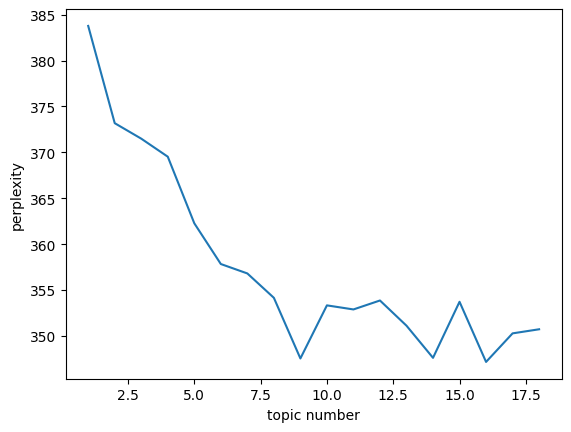

In [ ]:
n_t = 19
x = list(range(1,n_t))
plt.plot(x, plexs[1: n_t])
plt.xlabel("topic number")
plt.ylabel("perplexity")
plt.savefig("/content/perplexity_1.png", format="png", bbox_inches="tight")

# display the figure
plt.show()

**Test 2: lifelong learning_Chinese_2.xlsx**

In [ ]:
Chinese_df = pd.read_excel("/content/lifelong learning_Chinese_2.xlsx")

# delate the NA abstracts
Chinese_df.dropna(subset=['摘要'], inplace=True)

# delete rows where the character numbers are less than 15.
for index, row in Chinese_df.iterrows():
    if len(row["摘要"]) < 15:
        Chinese_df.drop(index, inplace=True)

# reset the index
Chinese_df.reset_index(drop=True, inplace=True)

Chinese_df.head(5)

,来源库,题名,作者,单位,文献来源,摘要,发表时间,年份
0,期刊,挪威的终身学习政策,史鋫娟,浙江大学教育系 浙江杭州310028,比较教育研究,挪威终身学习政策制定有其特定的社会与政治背景、经济与劳动力市场背景以及人口与文化背景。在这些...,2004-02-10,2004
1,期刊,论当代陶行知终身教育理念中老年教育的借鉴价值,赵时桂;,福建师范大学继续教育学院 福建福州350007,继续教育研究,"人口老龄化是一种全球化趋势。随着老年人口的增加,老年问题将越来越突出,要面临一系列的社会问题...",2008-02-15,2008
2,期刊,终身学习在行业中的发展趋势——企业大学与企业E-learning,吴峰;,北京大学教育学院;,中国远程教育,"党的十七大报告中明确指出要将我国建设成为学习型社会,终身学习理念得到全国范围的广泛接纳,终身...",2012-03-06,2012
3,期刊,基于终身教育的高职教育教学改革探析,高清林;,福建电力职业技术学院;,继续教育研究,"以终身教育为视角,对我国高职教育的现状进行剖析,并以高职教育的定位为基准,对办学模式、教学模...",2009-11-15,2009
4,期刊,高等教育自学考试在构建我国终身教育体系中的作用,潘强,江苏省自学考试办公室,江苏高教,"在中国 ,一直把正规学校教育看作是终身教育体系的核心。但由于人口数量、经济条件和教育规模的限...",2003-05-05,2003


In [ ]:
# input stopwords
stop_file = "/content/Chinese_stopwords.txt"

stopword_list = []
# read the stopwords.txt file
with open(stop_file, 'r', encoding='utf-8') as file:
    # read stopwords and save into the list
    for line in file:
        stopword_list.append(line.strip())  # delete empty symbols

# create the predicted topics for LDA
predict_topic_csv_path = 'topic-distribution.csv'

Chinese_df['摘要'] = Chinese_df['摘要'].astype(str)   # transfer 'Abstract' into strings

# define a function to remove stopwords
def clean_text(text):
  words = jieba.lcut(text)
  words = [w for w in words if w not in stopword_list]
  return ' '.join(words)

Chinese_df["Contents"] = Chinese_df["摘要"].apply(clean_text)

def chinese_word_cut(mytext):
    flag_list = ['a','ag','an','b','d','dg','h','i','j','l','n','ng','nr','nrfg','nrt','ns','nt','nz','r','rg','rr','rz','t','tg','vn']

    word_list = []

    #jieba tokenization
    seg_list = psg.cut(mytext)
    for seg_word in seg_list:
        word = re.sub(u'[^\u4e00-\u9fa5]','',seg_word.word)
        if seg_word.flag in flag_list:
            word_list.append(word)
    return (" ").join(word_list)

Chinese_df["Chinese_cutted"] = Chinese_df["Contents"].apply(chinese_word_cut)

Chinese_df["Chinese_cutted"]

,Chinese_cutted
0,挪威 政策 特定 政治 背景 经济 劳动力 市场 背景 人口 文化背景 背景 政策 具体措施...
1,人口老龄化 全球化 趋势 老年人 老年 越来越 关心 老年人 生活 健康 老龄化 全 责任 ...
2,党 大 报告 明确指出 建设 学习型 各个领域 有序 企业 新 趋势 企业 大学 信息技术 ...
3,视角 高职 现状 剖析 高职 定位 基准 办学 模式 教学模式 专业 建设 课程 建设 师资...
4,正规 学校 人口数量 经济 规模 普通高校 不 所有人 高校 人满为患 依然 供需矛盾 现阶...
...,...
1671,战略 总 目标 学习型 都 意义 正 重要性 落到实处 政策 深层次 领域 环节 实质 更为...
1672,中华人民共和国 教育法 国家 社会主义 市场经济 改革 各类 思想 已 理论 形式 阶段 已 改革
1673,多元化 职业 成人教育 模式 不断更新 变革 人才 形势 严峻 人 过程 越来越 特别 职业...
1674,人 自觉性 主体性 人 空间 人 固有 开放性 创造性 超越性 生命 现实 基础 正是 有限...


This is the epoch:  1
This is the epoch:  2
This is the epoch:  3
This is the epoch:  4
This is the epoch:  5
This is the epoch:  6
This is the epoch:  7
This is the epoch:  8
This is the epoch:  9
This is the epoch:  10
This is the epoch:  11
This is the epoch:  12
This is the epoch:  13
This is the epoch:  14
This is the epoch:  15
This is the epoch:  16
This is the epoch:  17
This is the epoch:  18
This is the epoch:  19


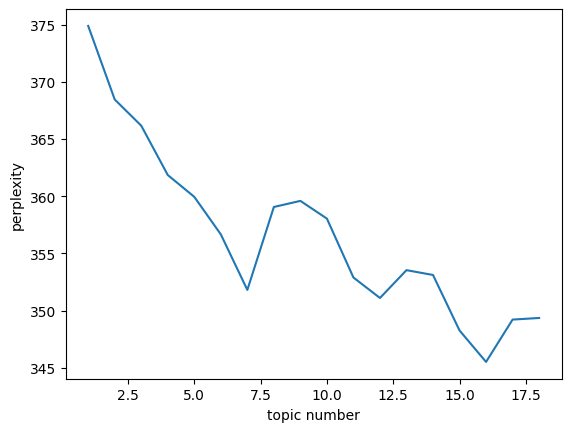

In [ ]:
n_features = 1500     # extract 1500 features
tf_vectorizer = CountVectorizer(strip_accents = 'unicode',
                    max_features=n_features,
                    stop_words='english',
                    max_df = 0.5,
                    min_df = 10)
tf = tf_vectorizer.fit_transform(Chinese_df.Chinese_cutted)

# perplexity curve

plexs = []
scores = []
n_max_topics = 20
for i in range(1, n_max_topics):
    print('This is the epoch: ',i)
    lda = LatentDirichletAllocation(n_components=i, max_iter=50,
                                    learning_method='batch',
                                    learning_offset=50,random_state=0)
    lda.fit(tf)
    plexs.append(lda.perplexity(tf))
    scores.append(lda.score(tf))

n_t = 19
x = list(range(1,n_t))
plt.plot(x, plexs[1: n_t])
plt.xlabel("topic number")
plt.ylabel("perplexity")
plt.savefig("/content/perplexity_2.png", format="png", bbox_inches="tight")

# display the figure
plt.show()

**Test 3: lifelong learning_Chinese_3.xlsx**

In [ ]:
Chinese_df = pd.read_excel("/content/lifelong learning_Chinese_3.xlsx")

# delate the NA abstracts
Chinese_df.dropna(subset=['摘要'], inplace=True)

# delete rows where the character numbers are less than 15.
for index, row in Chinese_df.iterrows():
    if len(row["摘要"]) < 15:
        Chinese_df.drop(index, inplace=True)

# reset the index
Chinese_df.reset_index(drop=True, inplace=True)

Chinese_df.head(5)

,来源库,题名,作者,单位,文献来源,摘要,发表时间,年份
0,期刊,进入“终身学习时代”的艺术设计教育,吴余青,湖南师范大学美术学院艺术设计系 讲师,装饰,"被称为“网络世纪”的21世纪,正以一种惊人的速度发展着,它打破了地域和疆界,几秒钟之内就可以...",2003-12-01 00:00:00,2003
1,期刊,辽西五市三甲医院550名护士终身学习意向调查及影响因素分析,赵思宇;张会君;,辽宁医学院研究生学院;辽宁医学院护理学院;,重庆医学,"目的了解辽宁西部三甲医院临床护士终身学习意向现状,分析影响护士终身学习意向的相关因素。方法采...",2012-09-10 00:00:00,2012
2,期刊,终身教育立法的“政策之窗”何以开启——多源流理论视域下我国政策的走向,蒋纪平;张义兵;满其峰;,南京师范大学教育科学学院;河南科技学院信息工程学院;,重庆高教研究,终身教育的理念已深入人心。《中华人民共和国国民经济和社会发展第十四个五年规划和2035年远景...,2022-12-05 16:09:00,2023
3,期刊,基于形成性自我评价的大学生终身学习能力培养研究,张梅;,重庆大学外国语学院;,重庆大学学报(社会科学版),"随着中国大学英语教学与测试研究和实践的逐渐深化,形成性评价越来越受到老师的重视。形成性评价主...",2010-01-15 00:00:00,2010
4,期刊,终身教育视野下的思想政治课价值分析,陈开和;,江苏省常州高级中学;,中学政治教学参考,《国家中长期教育改革和发展规划纲要(2010-2020年)》明确要求构建体系完备、灵活开放的...,2012-08-10 00:00:00,2012


In [ ]:
# input stopwords
stop_file = "/content/Chinese_stopwords.txt"

stopword_list = []
# read the stopwords.txt file
with open(stop_file, 'r', encoding='utf-8') as file:
    # read stopwords and save into the list
    for line in file:
        stopword_list.append(line.strip())  # delete empty symbols

# create the predicted topics for LDA
predict_topic_csv_path = 'topic-distribution.csv'

Chinese_df['摘要'] = Chinese_df['摘要'].astype(str)   # transfer 'Abstract' into strings

# define a function to remove stopwords
def clean_text(text):
  words = jieba.lcut(text)
  words = [w for w in words if w not in stopword_list]
  return ' '.join(words)

Chinese_df["Contents"] = Chinese_df["摘要"].apply(clean_text)

def chinese_word_cut(mytext):
    flag_list = ['a','ag','an','b','d','dg','h','i','j','l','n','ng','nr','nrfg','nrt','ns','nt','nz','r','rg','rr','rz','t','tg','vn']

    word_list = []

    #jieba tokenization
    seg_list = psg.cut(mytext)
    for seg_word in seg_list:
        word = re.sub(u'[^\u4e00-\u9fa5]','',seg_word.word)
        if seg_word.flag in flag_list:
            word_list.append(word)
    return (" ").join(word_list)

Chinese_df["Chinese_cutted"] = Chinese_df["Contents"].apply(chinese_word_cut)

Chinese_df["Chinese_cutted"]

,Chinese_cutted
0,网络 世纪 世纪 正 惊人 速度 地域 疆界 几秒钟 联通 世界 国家 人 生活 未来 未来...
1,目的 辽宁 三甲 医院 临床 护士 意向 现状 分析 影响 护士 意向 因素 方法 分层 随...
2,已 深入人心 中华人民共和国 国民经济 五年 规划 远景 目标 纲要 建设 学习型 迫切需要...
3,中国大学 英语教学 测试 深化 性 评价 越来越 老师 性 评价 教师 学生 评价 学生 自...
4,国家 中长期 改革 规划 纲要 明确要求 灵活 立交桥 体制 建设 重大项目 改革 试点 概...
...,...
1671,人 新 时代背景 最 明智 学校 特权 过程 决定性 意义 序曲 高质量 基础教育 前提 学...
1672,已 当代 世界性 思潮 新 观念 学校 思潮 改革 充分认识 学校 基础 统一 人 生产 生...
1673,起点 幼儿 阶段 视野 幼儿教师 至关重要 地位 影响 幼儿教师 幼儿教育 改革 客观 专业...
1674,全球化 背景 当代 正 世界 知识经济 时代 到来 这 语境 理论 再 理论 演化过程 这 ...


This is the epoch:  1
This is the epoch:  2
This is the epoch:  3
This is the epoch:  4
This is the epoch:  5
This is the epoch:  6
This is the epoch:  7
This is the epoch:  8
This is the epoch:  9
This is the epoch:  10
This is the epoch:  11
This is the epoch:  12
This is the epoch:  13
This is the epoch:  14
This is the epoch:  15
This is the epoch:  16
This is the epoch:  17
This is the epoch:  18
This is the epoch:  19


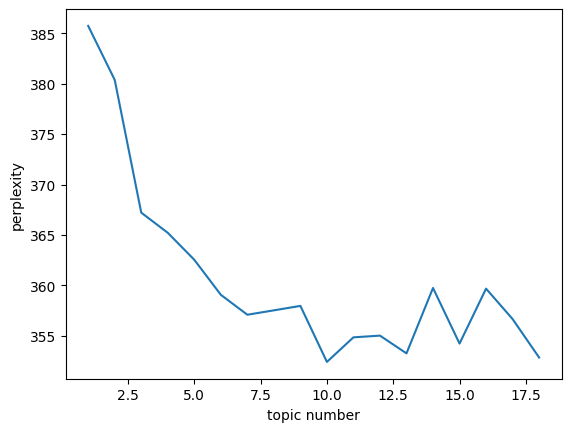

In [ ]:
n_features = 1500     # extract 1500 features
tf_vectorizer = CountVectorizer(strip_accents = 'unicode',
                    max_features=n_features,
                    stop_words='english',
                    max_df = 0.5,
                    min_df = 10)
tf = tf_vectorizer.fit_transform(Chinese_df.Chinese_cutted)

# perplexity curve

plexs = []
scores = []
n_max_topics = 20
for i in range(1, n_max_topics):
    print('This is the epoch: ',i)
    lda = LatentDirichletAllocation(n_components=i, max_iter=50,
                                    learning_method='batch',
                                    learning_offset=50,random_state=0)
    lda.fit(tf)
    plexs.append(lda.perplexity(tf))
    scores.append(lda.score(tf))

n_t = 19
x = list(range(1,n_t))
plt.plot(x, plexs[1: n_t])
plt.xlabel("topic number")
plt.ylabel("perplexity")
plt.savefig("/content/perplexity_3.png", format="png", bbox_inches="tight")

# display the figure
plt.show()

**Test 4: lifelong learning_Chinese_4.xlsx**

In [ ]:
Chinese_df = pd.read_excel("/content/lifelong learning_Chinese_4.xlsx")

# delate the NA abstracts
Chinese_df.dropna(subset=['摘要'], inplace=True)

# delete rows where the character numbers are less than 15.
for index, row in Chinese_df.iterrows():
    if len(row["摘要"]) < 15:
        Chinese_df.drop(index, inplace=True)

# reset the index
Chinese_df.reset_index(drop=True, inplace=True)

Chinese_df.head(5)

,来源库,题名,作者,单位,文献来源,摘要,发表时间,年份
0,期刊,社区终身学习理念与我国社区教育转型——关于我国社区教育现状、问题及发展对策的调查研究,“面向21世纪中国社区中的终身学习的调查与研究”课题组,教育研究,教育研究,"当前社区教育研究亟需方法上的创新。本文以小城镇社区教育为调查研究对象 ,运用类型比较研究法 ...",2002-11-17,2002
1,期刊,关于厦门市鼓浪屿社区居民终身学习需求的调查报告,"“推进我国社区教育发展的实验研究”厦门市子课题组 ,陈珂",厦门市教育科学研究所 福建厦门361000,成人教育,"21世纪中国将迈入学习化社会,社区教育是建立及完善终身教育体系、发展学习化社会的重要途径。“...",2004-07-10,2004
2,期刊,"关于建立终身教育体制,提高市民素质调研及对策(摘选) 加强成人教育为精神文明建设服务的新思路...",《关于建立终身教育体制;提高市民素质调研及对策》课题组;项秉健;,上海成人教育,上海成人教育,"精神文明建设是上海改革开放和现代化建设的强大精神动力、思想保证和智力支持,成人教育在精神文明...",1996-12-15,1996
3,期刊,对韩国形成终身学习和学习化社区的方法探究——以吉南(Jinan)县学习型农村计划为例,Eun Soon;Jongim Byun;韦立君;,华东师范大学课程与教学研究所;,全球教育展望,"学习型农村计划是对农村综合重构的一次行动,是以建立一个无论何时何地人人都可以学习的学习型社区...",2004-09-15,2004
4,期刊,信息素养和终身学习领域的图书馆员和其他信息专业人员的职业和专业发展机会与挑战,Forest Woody Horton;邱晓琳;,"International Information Consultant,Informati...",图书情报知识,"在今天和明天的培训班上,大家会反复地听到“信息素养和终身学习”。我很荣幸作为联合国教科文组织...",2009-01-10,2009


In [ ]:
# input stopwords
stop_file = "/content/Chinese_stopwords.txt"

stopword_list = []
# read the stopwords.txt file
with open(stop_file, 'r', encoding='utf-8') as file:
    # read stopwords and save into the list
    for line in file:
        stopword_list.append(line.strip())  # delete empty symbols

# create the predicted topics for LDA
predict_topic_csv_path = 'topic-distribution.csv'

Chinese_df['摘要'] = Chinese_df['摘要'].astype(str)   # transfer 'Abstract' into strings

# define a function to remove stopwords
def clean_text(text):
  words = jieba.lcut(text)
  words = [w for w in words if w not in stopword_list]
  return ' '.join(words)

Chinese_df["Contents"] = Chinese_df["摘要"].apply(clean_text)

def chinese_word_cut(mytext):
    flag_list = ['a','ag','an','b','d','dg','h','i','j','l','n','ng','nr','nrfg','nrt','ns','nt','nz','r','rg','rr','rz','t','tg','vn']

    word_list = []

    #jieba tokenization
    seg_list = psg.cut(mytext)
    for seg_word in seg_list:
        word = re.sub(u'[^\u4e00-\u9fa5]','',seg_word.word)
        if seg_word.flag in flag_list:
            word_list.append(word)
    return (" ").join(word_list)

Chinese_df["Chinese_cutted"] = Chinese_df["Contents"].apply(chinese_word_cut)

Chinese_df["Chinese_cutted"]

,Chinese_cutted
0,社区 方法 小城镇 社区 调查 对象 类型 研究法 调查 资料 数据 统计分析 社区 现状及...
1,世纪 化 社区 化 重要途径 社区 实验 总 课题组 调查 问卷 厦门市 鼓浪屿 社区 居民...
2,精神文明 建设 上海 改革开放 现代化 建设 强大 精神 动力 思想 智力 成人教育 精神文...
3,学习型 农村 计划 农村 综合 重构 何时何地 人人 都 学习型 社区 目标 公民 本 服务...
4,明天 培训班 信息 素养 荣幸 联合国教科文组织 信息 素养 项目 已 全世界 地区 主办 ...
...,...
1671,高等教育 自学 考试 理论 高等教育 改革 产物 载体 自学 考试 国民教育 建设 学习型 ...
1672,当代 必然趋势 生命线 该文 英国剑桥大学 分析
1673,传统 系统性 较为 狭隘 并未 指 教学 人生 阶段 持续性 更新 人 学习型 不谋而合 新...
1674,思想 世界性 思潮 各国 教育界 学前教育 深远 影响 思想 学前教育 地位 学前教育 内容 思路


This is the epoch:  1
This is the epoch:  2
This is the epoch:  3
This is the epoch:  4
This is the epoch:  5
This is the epoch:  6
This is the epoch:  7
This is the epoch:  8
This is the epoch:  9
This is the epoch:  10
This is the epoch:  11
This is the epoch:  12
This is the epoch:  13
This is the epoch:  14
This is the epoch:  15
This is the epoch:  16
This is the epoch:  17
This is the epoch:  18
This is the epoch:  19


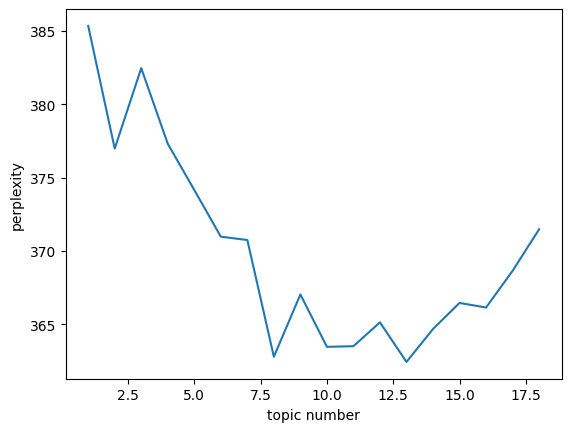

In [ ]:
n_features = 1500     # extract 1500 features
tf_vectorizer = CountVectorizer(strip_accents = 'unicode',
                    max_features=n_features,
                    stop_words='english',
                    max_df = 0.5,
                    min_df = 10)
tf = tf_vectorizer.fit_transform(Chinese_df.Chinese_cutted)

# perplexity curve

plexs = []
scores = []
n_max_topics = 20
for i in range(1, n_max_topics):
    print('This is the epoch: ',i)
    lda = LatentDirichletAllocation(n_components=i, max_iter=50,
                                    learning_method='batch',
                                    learning_offset=50,random_state=0)
    lda.fit(tf)
    plexs.append(lda.perplexity(tf))
    scores.append(lda.score(tf))

n_t = 19
x = list(range(1,n_t))
plt.plot(x, plexs[1: n_t])
plt.xlabel("topic number")
plt.ylabel("perplexity")
plt.savefig("/content/perplexity_4.png", format="png", bbox_inches="tight")

# display the figure
plt.show()

**Test 5: lifelong learning_Chinese_5.xlsx**

In [ ]:
Chinese_df = pd.read_excel("/content/lifelong learning_Chinese_5.xlsx")

# delate the NA abstracts
Chinese_df.dropna(subset=['摘要'], inplace=True)

# delete rows where the character numbers are less than 15.
for index, row in Chinese_df.iterrows():
    if len(row["摘要"]) < 15:
        Chinese_df.drop(index, inplace=True)

# reset the index
Chinese_df.reset_index(drop=True, inplace=True)

Chinese_df.head(5)

,来源库,题名,作者,单位,文献来源,摘要,发表时间,年份
0,期刊,进入“终身学习时代”的艺术设计教育,吴余青,湖南师范大学美术学院艺术设计系 讲师,装饰,"被称为“网络世纪”的21世纪,正以一种惊人的速度发展着,它打破了地域和疆界,几秒钟之内就可以...",2003-12-01 00:00:00,2003
1,期刊,辽西五市三甲医院550名护士终身学习意向调查及影响因素分析,赵思宇;张会君;,辽宁医学院研究生学院;辽宁医学院护理学院;,重庆医学,"目的了解辽宁西部三甲医院临床护士终身学习意向现状,分析影响护士终身学习意向的相关因素。方法采...",2012-09-10 00:00:00,2012
2,期刊,终身教育立法的“政策之窗”何以开启——多源流理论视域下我国政策的走向,蒋纪平;张义兵;满其峰;,南京师范大学教育科学学院;河南科技学院信息工程学院;,重庆高教研究,终身教育的理念已深入人心。《中华人民共和国国民经济和社会发展第十四个五年规划和2035年远景...,2022-12-05 16:09:00,2023
3,期刊,基于形成性自我评价的大学生终身学习能力培养研究,张梅;,重庆大学外国语学院;,重庆大学学报(社会科学版),"随着中国大学英语教学与测试研究和实践的逐渐深化,形成性评价越来越受到老师的重视。形成性评价主...",2010-01-15 00:00:00,2010
4,期刊,终身教育视野下的思想政治课价值分析,陈开和;,江苏省常州高级中学;,中学政治教学参考,《国家中长期教育改革和发展规划纲要(2010-2020年)》明确要求构建体系完备、灵活开放的...,2012-08-10 00:00:00,2012


In [ ]:
# input stopwords
stop_file = "/content/Chinese_stopwords.txt"

stopword_list = []
# read the stopwords.txt file
with open(stop_file, 'r', encoding='utf-8') as file:
    # read stopwords and save into the list
    for line in file:
        stopword_list.append(line.strip())  # delete empty symbols

# create the predicted topics for LDA
predict_topic_csv_path = 'topic-distribution.csv'

Chinese_df['摘要'] = Chinese_df['摘要'].astype(str)   # transfer 'Abstract' into strings

# define a function to remove stopwords
def clean_text(text):
  words = jieba.lcut(text)
  words = [w for w in words if w not in stopword_list]
  return ' '.join(words)

Chinese_df["Contents"] = Chinese_df["摘要"].apply(clean_text)

def chinese_word_cut(mytext):
    flag_list = ['a','ag','an','b','d','dg','h','i','j','l','n','ng','nr','nrfg','nrt','ns','nt','nz','r','rg','rr','rz','t','tg','vn']

    word_list = []

    #jieba tokenization
    seg_list = psg.cut(mytext)
    for seg_word in seg_list:
        word = re.sub(u'[^\u4e00-\u9fa5]','',seg_word.word)
        if seg_word.flag in flag_list:
            word_list.append(word)
    return (" ").join(word_list)

Chinese_df["Chinese_cutted"] = Chinese_df["Contents"].apply(chinese_word_cut)

Chinese_df["Chinese_cutted"]

,Chinese_cutted
0,网络 世纪 世纪 正 惊人 速度 地域 疆界 几秒钟 联通 世界 国家 人 生活 未来 未来...
1,目的 辽宁 三甲 医院 临床 护士 意向 现状 分析 影响 护士 意向 因素 方法 分层 随...
2,已 深入人心 中华人民共和国 国民经济 五年 规划 远景 目标 纲要 建设 学习型 迫切需要...
3,中国大学 英语教学 测试 深化 性 评价 越来越 老师 性 评价 教师 学生 评价 学生 自...
4,国家 中长期 改革 规划 纲要 明确要求 灵活 立交桥 体制 建设 重大项目 改革 试点 概...
...,...
1671,亚欧 两大洲 法律 财政 理论 现实 这 两大洲 研究者 政策 制定者 关心 为此 北京大学...
1672,企业 大学 世界 五百强 企业 企业 大学 美国 企业 大学 数量 平均 增长率 美国 企业...
1673,概念 联合国教科文组织 富尔 报告 洛比 曾 定义 现行 制度 重组 制度 计划 学员 态度...
1674,各类 在职人员 组成部分 在职人员 更新 当今 更好 企业 素质 员工素质 员工 更新 尤为...


This is the epoch:  1
This is the epoch:  2
This is the epoch:  3
This is the epoch:  4
This is the epoch:  5
This is the epoch:  6
This is the epoch:  7
This is the epoch:  8
This is the epoch:  9
This is the epoch:  10
This is the epoch:  11
This is the epoch:  12
This is the epoch:  13
This is the epoch:  14
This is the epoch:  15
This is the epoch:  16
This is the epoch:  17
This is the epoch:  18
This is the epoch:  19


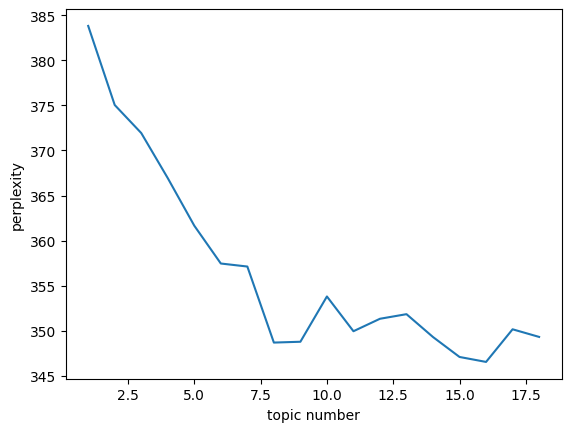

In [ ]:
n_features = 1500     # extract 1500 features
tf_vectorizer = CountVectorizer(strip_accents = 'unicode',
                    max_features=n_features,
                    stop_words='english',
                    max_df = 0.5,
                    min_df = 10)
tf = tf_vectorizer.fit_transform(Chinese_df.Chinese_cutted)

# perplexity curve

plexs = []
scores = []
n_max_topics = 20
for i in range(1, n_max_topics):
    print('This is the epoch: ',i)
    lda = LatentDirichletAllocation(n_components=i, max_iter=50,
                                    learning_method='batch',
                                    learning_offset=50,random_state=0)
    lda.fit(tf)
    plexs.append(lda.perplexity(tf))
    scores.append(lda.score(tf))

n_t = 19
x = list(range(1,n_t))
plt.plot(x, plexs[1: n_t])
plt.xlabel("topic number")
plt.ylabel("perplexity")
plt.savefig("/content/perplexity_5.png", format="png", bbox_inches="tight")

# display the figure
plt.show()

**Test 6: lifelong learning_Chinese_6.xlsx**

In [ ]:
Chinese_df = pd.read_excel("/content/lifelong learning_Chinese_6.xlsx")

# delate the NA abstracts
Chinese_df.dropna(subset=['摘要'], inplace=True)

# delete rows where the character numbers are less than 15.
for index, row in Chinese_df.iterrows():
    if len(row["摘要"]) < 15:
        Chinese_df.drop(index, inplace=True)

# reset the index
Chinese_df.reset_index(drop=True, inplace=True)

Chinese_df.head(5)

,来源库,题名,作者,单位,文献来源,摘要,发表时间,年份
0,期刊,终身教育视域下的“学分银行”构建研究,诸云;,南京理工大学自动化学院;,成人教育,"当前,随着我国教育改革不断推进,""学分银行""在终身教育中的应用逐渐受到重视。然而,受多种因素...",2015-12-07 10:53:00,2015
1,期刊,如何推进我国的终身学习进程——英国推进终身学习的新举措及其启示,吴雪萍;赵婷;,浙江大学教育学院教育学系;,教育发展研究,"当前,我国建设学习型社会面临诸多挑战:首先,我国尚未出台专门的终身学习法律,推进终身学习的各...",2016-05-10 00:00:00,2016
2,期刊,老龄化社会下我国终身教育发展体系的建构,邢琰;,河南牧业经济学院外国语系;,继续教育研究,"当前,我国人口老龄化形势较为严峻,老龄人口比重的不断增加给社会经济、政治和文化等方面都带来较...",2017-09-15 00:00:00,2017
3,期刊,服务终身教育体系构建 推进学习型社会建设——2011全国终身学习常州论坛综报,李术蕊;,中国职业技术教育,中国职业技术教育,"当前,我国正处于全面建设小康社会、加快推进社会主义现代化建设的新阶段。传统的教育理念、教育体...",2011-11-01 00:00:00,2011
4,期刊,我国终身教育政策保障机制的建设与探索,国卉男;,上海市教育科学研究院职业与成人教育研究所;,职教论坛,"当前,我国政府正在着力构建终身教育体系,进而形成满足公民学习需求的学习型社会,但这一体系的构...",2014-07-25 00:00:00,2014


In [ ]:
# input stopwords
stop_file = "/content/Chinese_stopwords.txt"

stopword_list = []
# read the stopwords.txt file
with open(stop_file, 'r', encoding='utf-8') as file:
    # read stopwords and save into the list
    for line in file:
        stopword_list.append(line.strip())  # delete empty symbols

# create the predicted topics for LDA
predict_topic_csv_path = 'topic-distribution.csv'

Chinese_df['摘要'] = Chinese_df['摘要'].astype(str)   # transfer 'Abstract' into strings

# define a function to remove stopwords
def clean_text(text):
  words = jieba.lcut(text)
  words = [w for w in words if w not in stopword_list]
  return ' '.join(words)

Chinese_df["Contents"] = Chinese_df["摘要"].apply(clean_text)

def chinese_word_cut(mytext):
    flag_list = ['a','ag','an','b','d','dg','h','i','j','l','n','ng','nr','nrfg','nrt','ns','nt','nz','r','rg','rr','rz','t','tg','vn']

    word_list = []

    #jieba tokenization
    seg_list = psg.cut(mytext)
    for seg_word in seg_list:
        word = re.sub(u'[^\u4e00-\u9fa5]','',seg_word.word)
        if seg_word.flag in flag_list:
            word_list.append(word)
    return (" ").join(word_list)

Chinese_df["Chinese_cutted"] = Chinese_df["Contents"].apply(chinese_word_cut)

Chinese_df["Chinese_cutted"]

,Chinese_cutted
0,改革 学分 银行 受到重视 因素 影响 学分 银行 建设 初期 为此 文章 学分 银行 制度...
1,建设 学习型 挑战 尚未 法律 各项 保障机制 亦 未 现有 政策 条例 证据 基础 不 明...
2,人口老龄化 形势 较为 严峻 老龄 人口 比重 经济 政治 文化 都 较大 影响 机遇 挑战...
3,正 建设 小康社会 社会主义 现代化 建设 新 阶段 传统 制度 正 经历 深刻 变革 思想...
4,公民 学习型 却 政策 保障机制 前提 近 政策 保障机制 建设 成效 如今 还 何种 制约...
...,...
1671,全民 路径 老年 网站 正 老年人 场域 其 老化 进程 暴露出 阈限 难题 老年 网站 老...
1672,社区 载体 社区 品牌 独特 内涵 成熟 社区 品牌 个案 定位 思路 内容 成效 影响 加...
1673,经济社会 地区 上海 立法 科学 发展观 立法 取之不尽 思想 源泉 思想 立法 理论 基础...
1674,新兴 职业 群体 新型 职业 农民 城镇化 密切联系 互联网 时代 新型 职业 农民 迫切需...


This is the epoch:  1
This is the epoch:  2
This is the epoch:  3
This is the epoch:  4
This is the epoch:  5
This is the epoch:  6
This is the epoch:  7
This is the epoch:  8
This is the epoch:  9
This is the epoch:  10
This is the epoch:  11
This is the epoch:  12
This is the epoch:  13
This is the epoch:  14
This is the epoch:  15
This is the epoch:  16
This is the epoch:  17
This is the epoch:  18
This is the epoch:  19


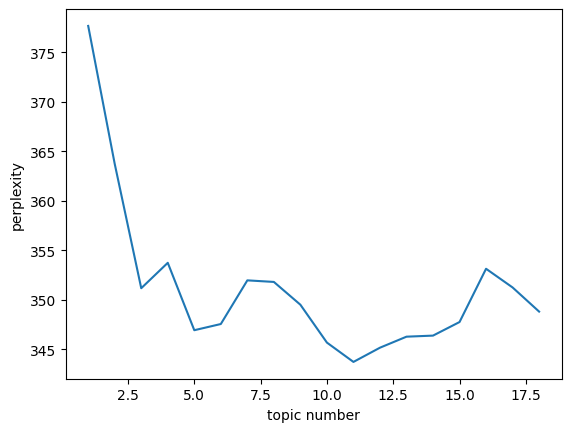

In [ ]:
n_features = 1500     # extract 1500 features
tf_vectorizer = CountVectorizer(strip_accents = 'unicode',
                    max_features=n_features,
                    stop_words='english',
                    max_df = 0.5,
                    min_df = 10)
tf = tf_vectorizer.fit_transform(Chinese_df.Chinese_cutted)

# perplexity curve

plexs = []
scores = []
n_max_topics = 20
for i in range(1, n_max_topics):
    print('This is the epoch: ',i)
    lda = LatentDirichletAllocation(n_components=i, max_iter=50,
                                    learning_method='batch',
                                    learning_offset=50,random_state=0)
    lda.fit(tf)
    plexs.append(lda.perplexity(tf))
    scores.append(lda.score(tf))

n_t = 19
x = list(range(1,n_t))
plt.plot(x, plexs[1: n_t])
plt.xlabel("topic number")
plt.ylabel("perplexity")
plt.savefig("/content/perplexity_6.png", format="png", bbox_inches="tight")

# display the figure
plt.show()